##Nation

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/Jcharis/Python-Machine-Learning/master/Predicting_Nationality_Ethnicity_with_Names_Using_ML/Names_Dataset.csv")
df


,Unnamed: 0,names,nationality
0,0,Gershon,yiddish
1,1,Lantz,yiddish
2,2,Zaide,yiddish
3,3,Zalman,yiddish
4,4,Zindel,yiddish
...,...,...,...
3233,3283,Virsila,czechoslovakian
3234,3284,Vondra,czechoslovakian
3235,3285,Zdenek,czechoslovakian
3236,3286,Zelenka,czechoslovakian


In [46]:
df.shape

(3238, 3)

In [47]:
df.columns

Index(['Unnamed: 0', 'names', 'nationality'], dtype='object')

In [48]:
df.head()

,Unnamed: 0,names,nationality
0,0,Gershon,yiddish
1,1,Lantz,yiddish
2,2,Zaide,yiddish
3,3,Zalman,yiddish
4,4,Zindel,yiddish


In [49]:
df['nationality'].unique()

array(['yiddish', 'gaelic', 'african', 'irish', 'hungarian', 'german',
       'swedish', 'japanese', 'italian', 'american', 'hawaiian', 'greek',
       'polynesian', 'scandinavian', 'spanish', 'celtic', 'old-english',
       'korean', 'sanskrit', 'african-american', 'hebrew', 'norse',
       'chinese', 'finnish', 'persian', 'scottish', 'slavic', 'english',
       'old-norse', 'dutch', 'armenian', 'welsh', 'polish', 'teutonic',
       'russian', 'egyptian', 'arabic', 'swahili', 'native-american',
       'old-french', 'french', 'middle-english', 'latin', 'vietnamese',
       'danish', 'hindi', 'old-german', 'turkish', 'indian',
       'czechoslovakian'], dtype=object)

In [50]:
class_name = ['yiddish', 'gaelic', 'african', 'irish', 'hungarian', 'german',
       'swedish', 'japanese', 'italian', 'american', 'hawaiian', 'greek',
       'polynesian', 'scandinavian', 'spanish', 'celtic', 'old-english',
       'korean', 'sanskrit', 'african-american', 'hebrew', 'norse',
       'chinese', 'finnish', 'persian', 'scottish', 'slavic', 'english',
       'old-norse', 'dutch', 'armenian', 'welsh', 'polish', 'teutonic',
       'russian', 'egyptian', 'arabic', 'swahili', 'native-american',
       'old-french', 'french', 'middle-english', 'latin', 'vietnamese',
       'danish', 'hindi', 'old-german', 'turkish', 'indian',
       'czechoslovakian']

In [51]:
len(class_name)

50

In [52]:
df.groupby('nationality')['names'].size()


nationality
african             100
african-american    100
american            100
arabic              100
armenian             17
celtic               62
chinese             100
czechoslovakian      38
danish               11
dutch                24
egyptian             30
english             100
finnish              13
french              100
gaelic               87
german              100
greek               100
hawaiian            100
hebrew              100
hindi               100
hungarian            64
indian               25
irish               100
italian             100
japanese            100
korean               16
latin               100
middle-english       45
native-american     100
norse                40
old-english         100
old-french           46
old-german           40
old-norse            28
persian              55
polish               48
polynesian           15
russian              85
sanskrit             28
scandinavian        100
scottish             74
slav

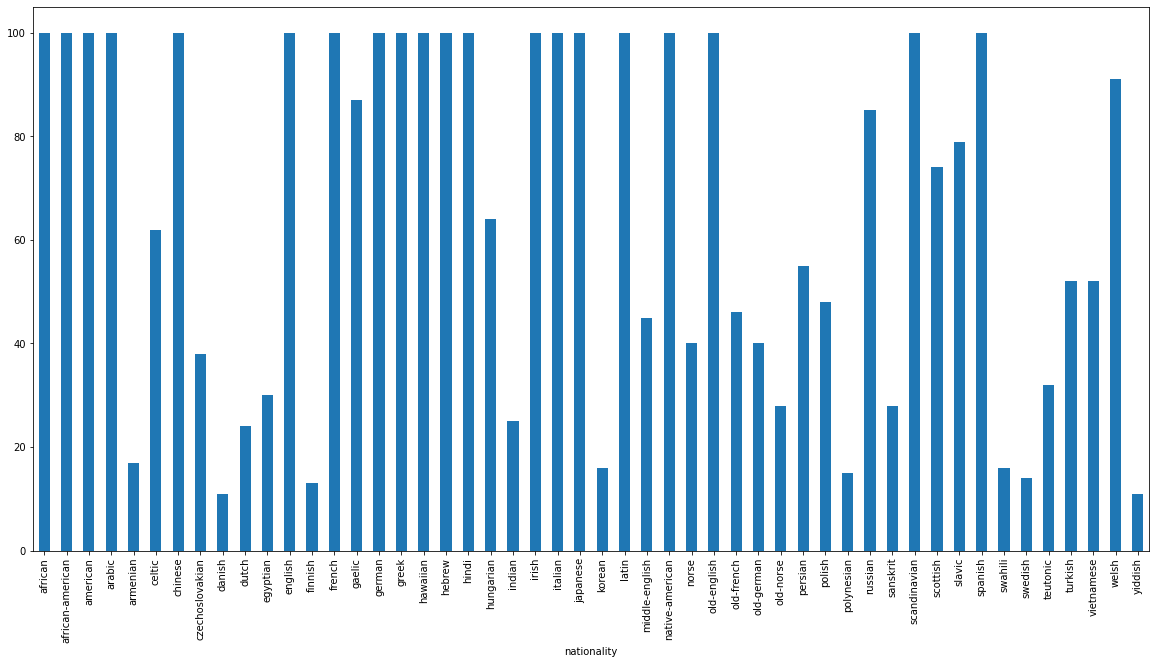

In [53]:
df.groupby('nationality')['names'].size().plot(kind='bar',figsize=(20,10))


In [54]:
#train_model

In [55]:
Xfeatures = df['names']
ylabels= df['nationality']

In [56]:
cv = CountVectorizer() #chuyen_thanh_matran 
X = cv.fit_transform(Xfeatures)

In [57]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaliyah',
 'aari',
 'aaron',
 'aase',
 'aba',
 'aban',
 'abbas',
 'abbellonna',
 'abbott',
 'abby',
 'abdiel',
 'abdulaziz',
 'abel',
 'abelard',
 'abeni',
 'abeque',
 'abey',
 'abeytu',
 'abhay',
 'abhijit',
 'abhorson',
 'abia',
 'abiba',
 'abie',
 'abigail',
 'abijah',
 'abira',
 'abital',
 'abmaba',
 'abner',
 'abra',
 'abraham',
 'abrahsa',
 'abriana',
 'abril',
 'absolom',
 'abtin',
 'abuna',
 'acacio',
 'acantha',
 'ace',
 'achachak',
 'achazia',
 'achilles',
 'achuta',
 'ackley',
 'acton',
 'acura',
 'ada',
 'adahy',
 'adalai',
 'adalbert',
 'adalgisa',
 'adalgiso',
 'adalia',
 'adam',
 'adamina',
 'adan',
 'adar',
 'adara',
 'adare',
 'addai',
 'addison',
 'adelaide',
 'adelbert',
 'adelfried',
 'adelino',
 'adelmio',
 'adelmo',
 'adelpha',
 'ademaro',
 'adena',
 'adeodatus',
 'aderes',
 'adger',
 'adham',
 'adia',
 'adie',
 'adin',
 'aditya',
 'adler',
 'adley',
 'admon',
 'adney',
 'adoette',
 'adolfina',
 'adolph',
 'adon',
 'adonis',
 'adora',
 'adrian',
 'adrienne',
 'a

In [58]:
# tạo file mới 
import joblib

In [59]:
nationality_vectorizer = open("nationality_vectorizer.pkl","wb")
joblib.dump(cv,nationality_vectorizer)

In [60]:
nationality_vectorizer.close()

In [61]:
# bắt đầu train với x_train, y_train là 66,67%. x_test, y_test là 33,33%
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.33,random_state=42)
nv = MultinomialNB()
nv.fit(x_train,y_train)

MultinomialNB()

In [62]:
# độ chính xác cura model
nv.score(x_test,y_test)

0.05986903648269411

In [63]:
sample1 = ["Kofi"]
vect1 = cv.transform(sample1).toarray()
nv.predict(vect1)


array(['african'], dtype='<U16')

In [64]:
sample2 = ["Li","John","Li","Vladmir"]
vect2 = cv.transform(sample2).toarray()
nv.predict(vect2)

array(['chinese', 'french', 'chinese', 'french'], dtype='<U16')

In [65]:
# Logistic Regression
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [66]:
logit.score(x_test,y_test)


0.0626753975678204

In [67]:
# Single Prediction with Logit
logit.predict(vect1)

array(['african'], dtype=object)

In [68]:
logit.predict(vect2)

array(['chinese', 'french', 'chinese', 'french'], dtype=object)

In [69]:
sample_3 = ["katya","natasha"]
vect3 = cv.transform(sample_3).toarray()
logit.predict(vect3)

array(['french', 'french'], dtype=object)

In [70]:
sample2 = ["Li","John","Ali","Vladmir"]
vect2 = cv.transform(sample2).toarray()
nv.predict(vect2)

array(['chinese', 'french', 'arabic', 'french'], dtype='<U16')

In [71]:
sample2 = ["Li","John","Ali","Vladmir"]
vect2 = cv.transform(sample2).toarray()
nv.predict(vect2)

array(['chinese', 'french', 'arabic', 'french'], dtype='<U16')

In [72]:
#Lưu model
import joblib

In [73]:
nationality_nv_model = open("nationality_nv_model.pkl","wb")
joblib.dump(nv,nationality_nv_model)
nationality_nv_model.close()

In [74]:
nationality_logit_model = open("nationality_logit_model.pkl","wb")
joblib.dump(nv,nationality_logit_model)
nationality_logit_model.close()